In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('2001-2012.csv')

In [4]:
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5


In [5]:
years_title=[str(i) for i in range(2001,2013)]

In [6]:
STATES_IN_INDIA=df['STATE/UT'].unique()
STATES_IN_INDIA=STATES_IN_INDIA[:-4]

STATES_IN_INDIA

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI'], dtype=object)

In [7]:
TYPES_OF_CASES=df['CRIME HEAD'].unique()
TYPES_OF_CASES=TYPES_OF_CASES[:-1]
TYPES_OF_CASES

array(['INFANTICIDE', 'MURDER OF CHILDREN', 'RAPE OF CHILDREN',
       'KIDNAPPING and ABDUCTION OF CHILDREN', 'FOETICIDE',
       'ABETMENT OF SUICIDE', 'EXPOSURE AND ABANDONMENT',
       'PROCURATION OF MINOR GILRS', 'BUYING OF GIRLS FOR PROSTITUTION',
       'SELLING OF GIRLS FOR PROSTITUTION',
       'PROHIBITION OF CHILD MARRIAGE ACT',
       'OTHER CRIMES AGAINST CHILDREN'], dtype=object)

C:\Users\91934\AppData\Local\Temp\ipykernel_24720\847933893.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(12, 8), dpi=80, facecolor='w',edgecolor='k')


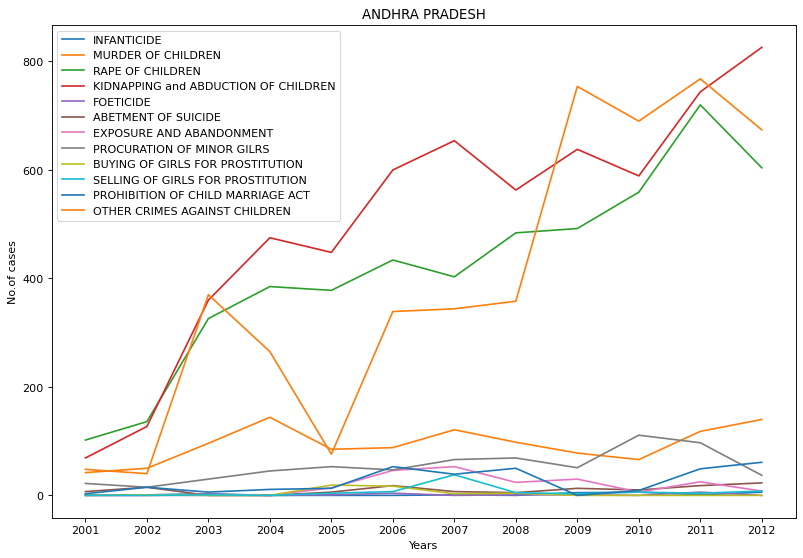

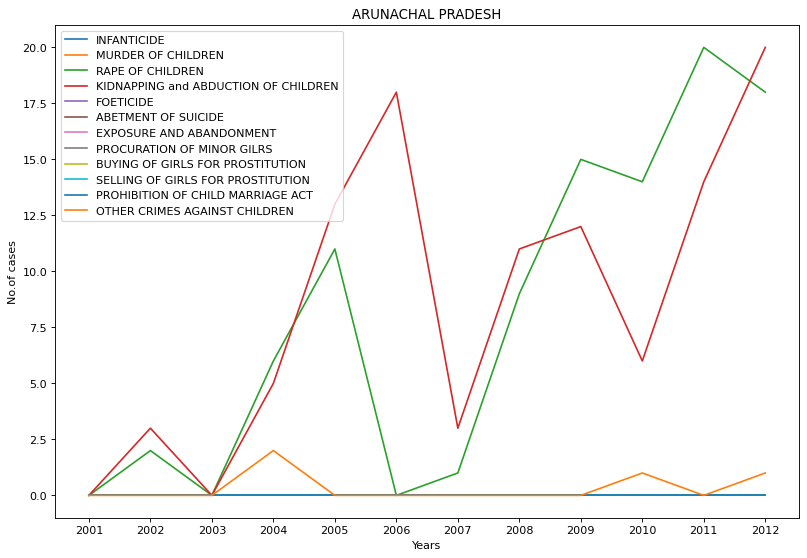

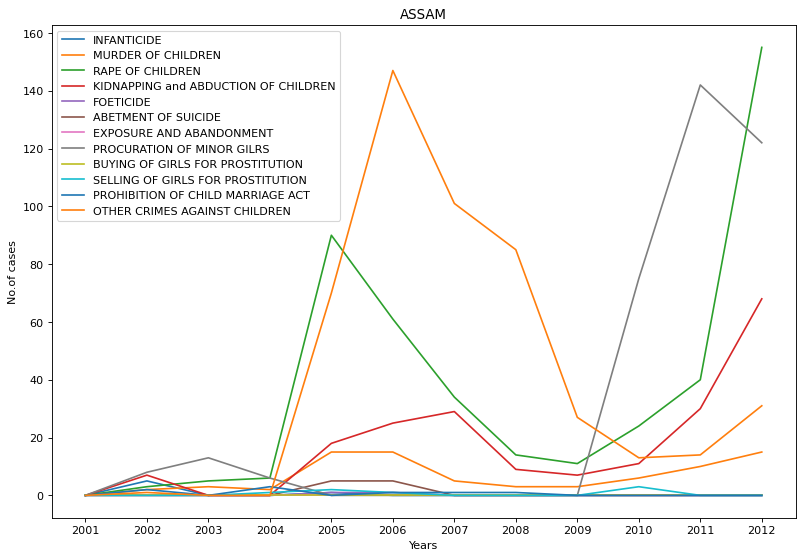

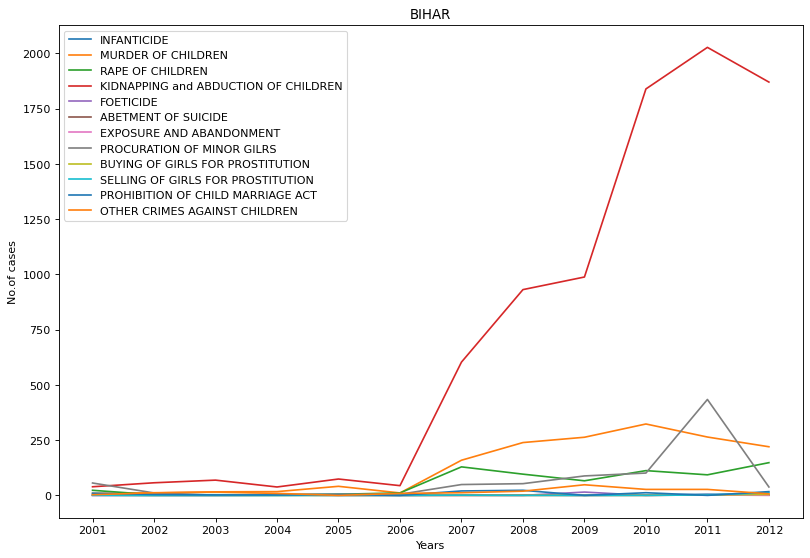

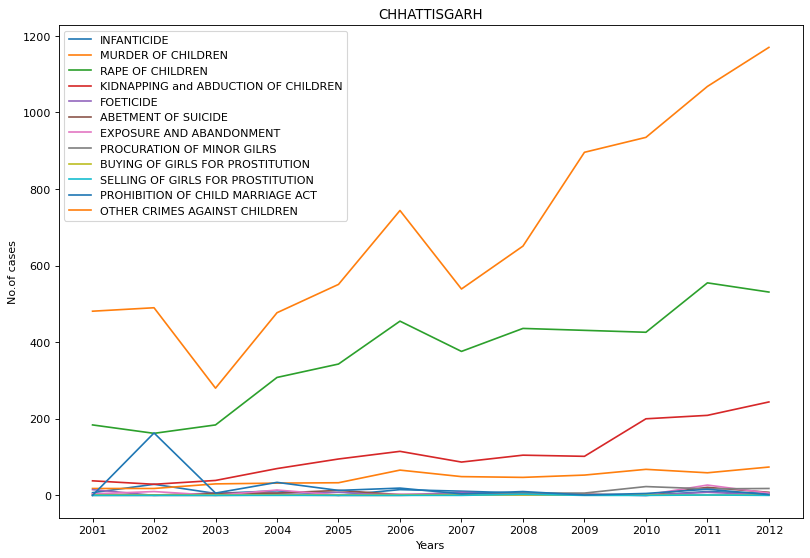

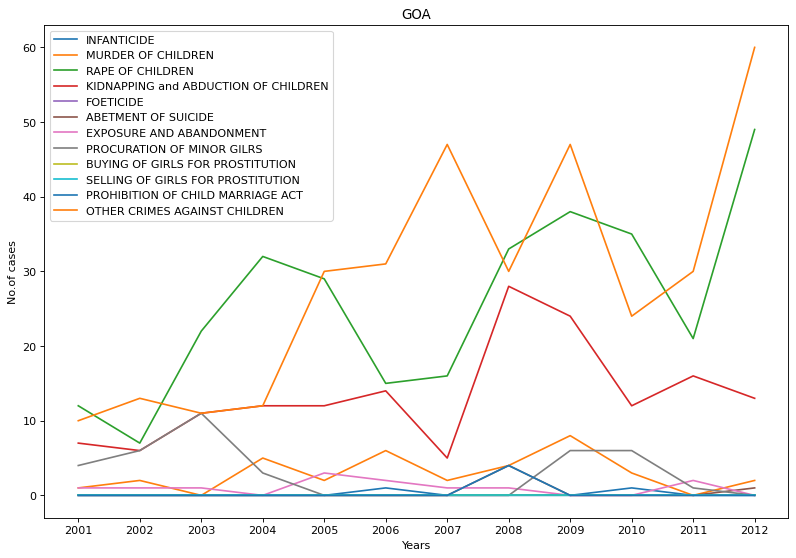

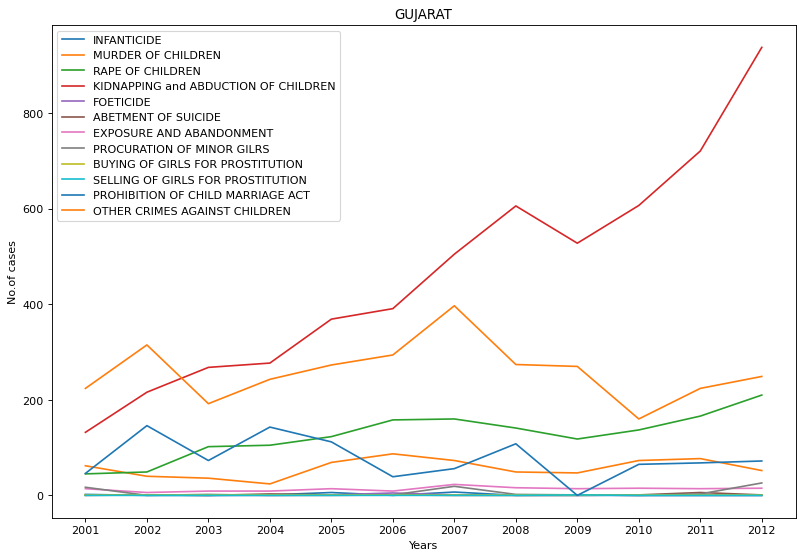

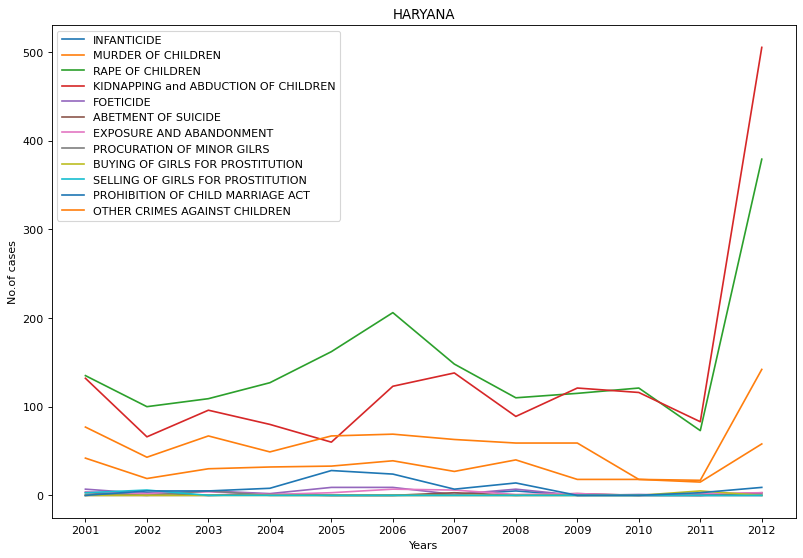

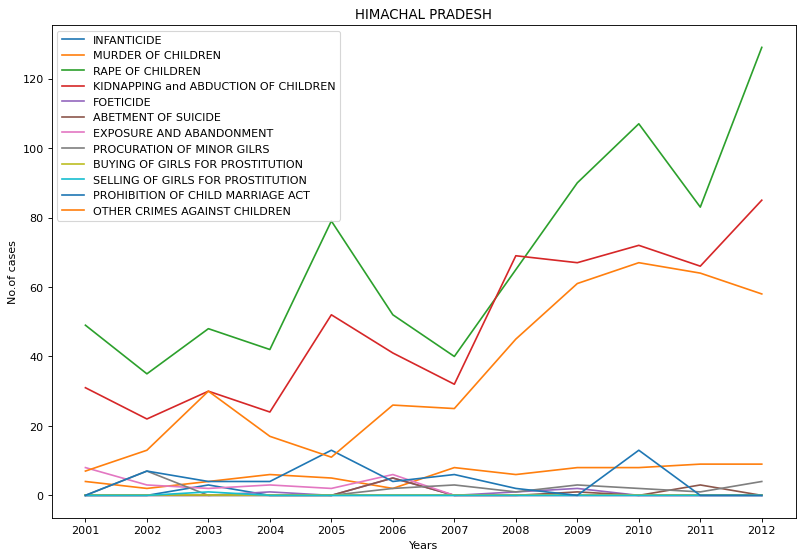

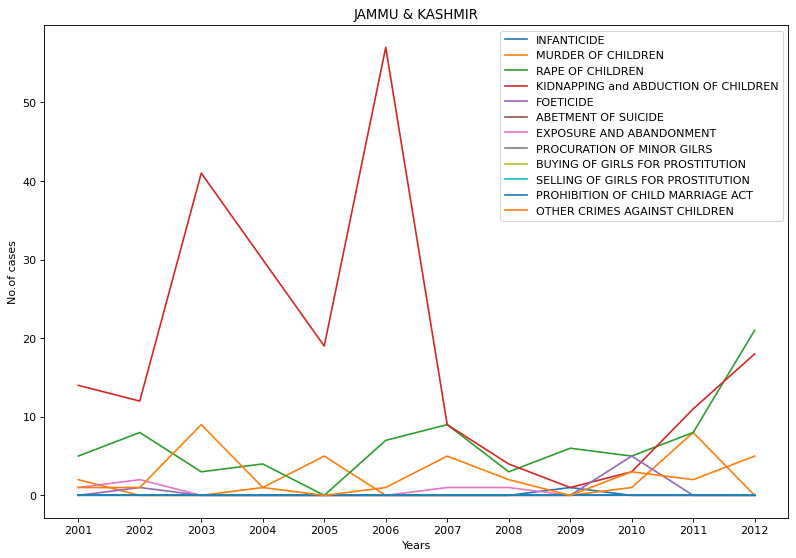

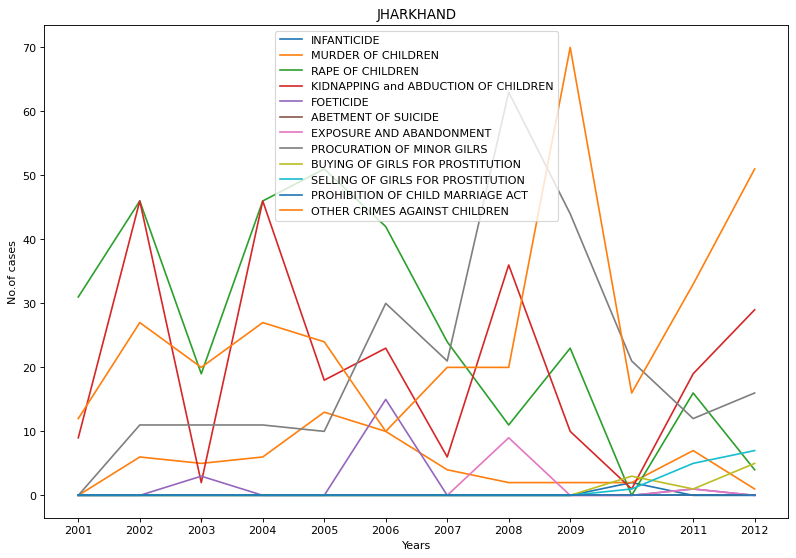

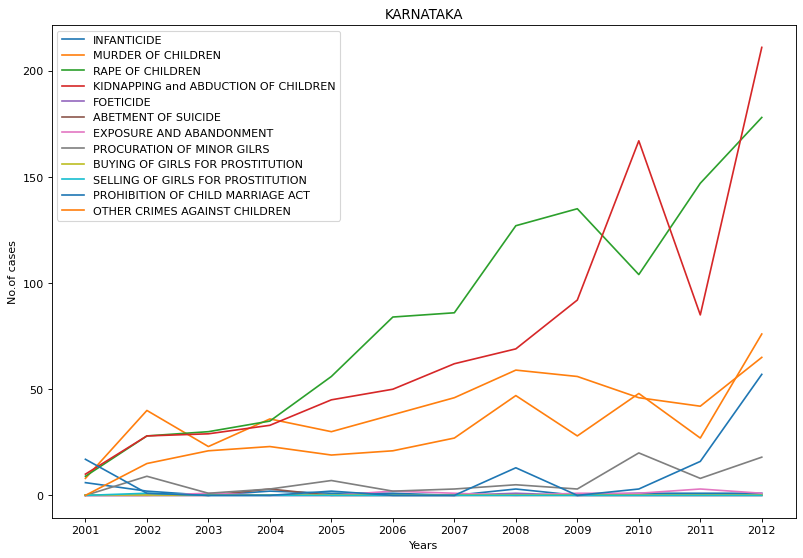

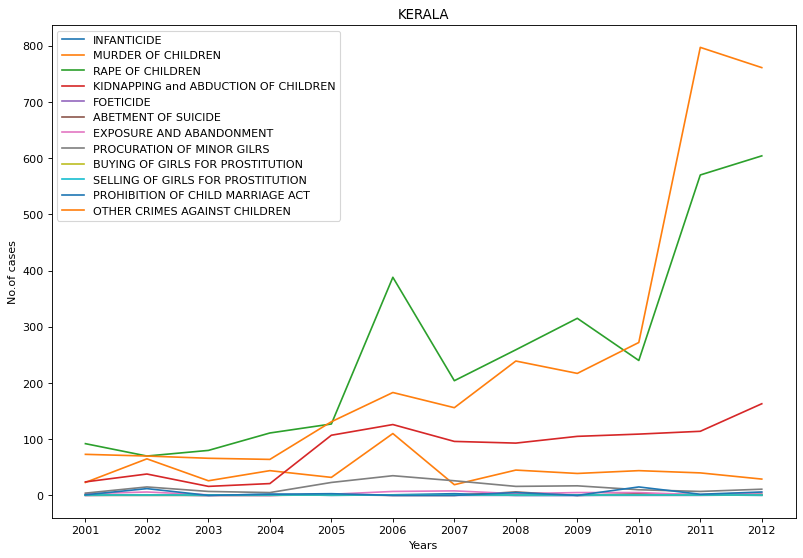

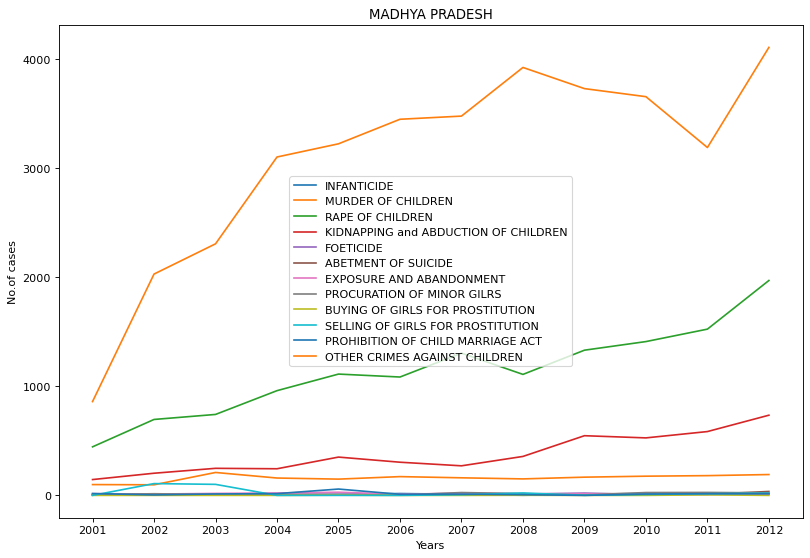

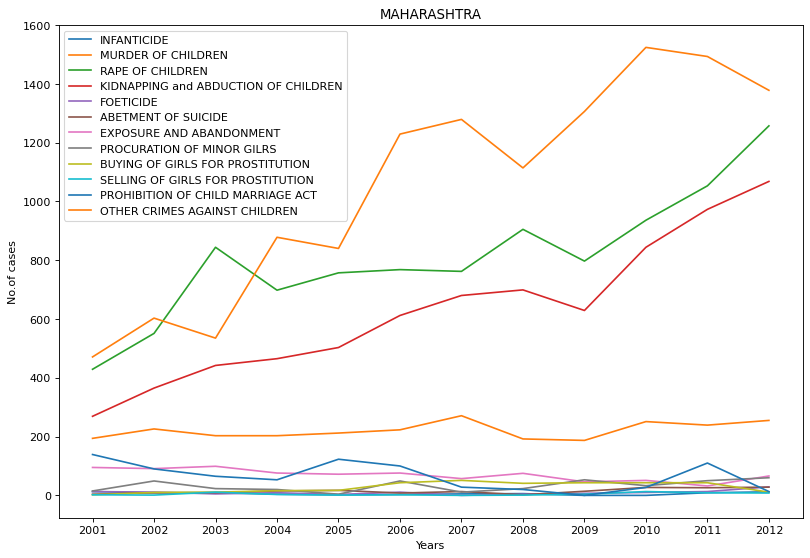

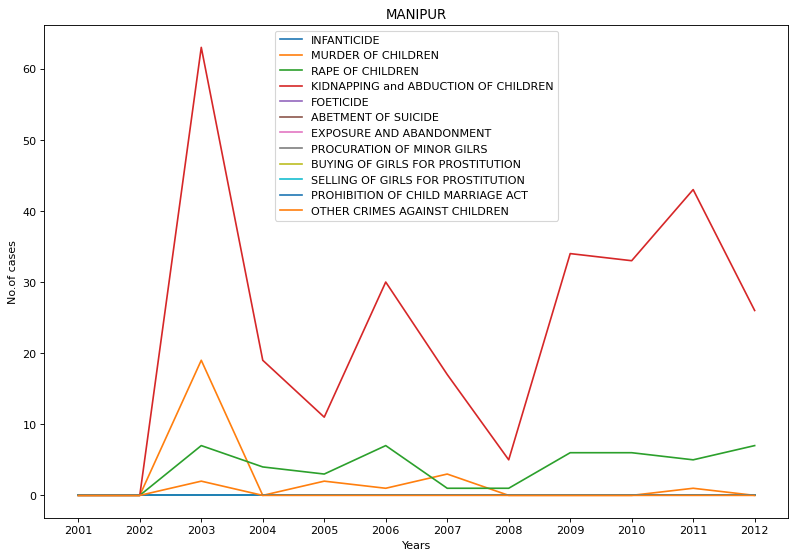

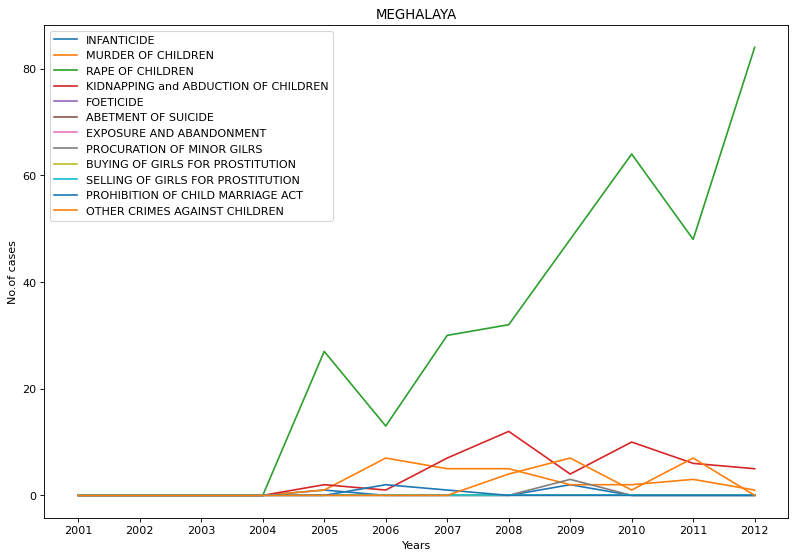

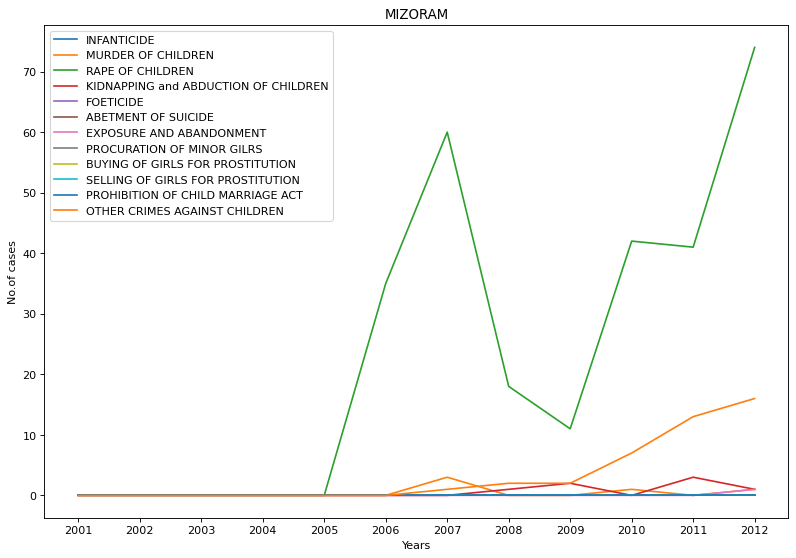

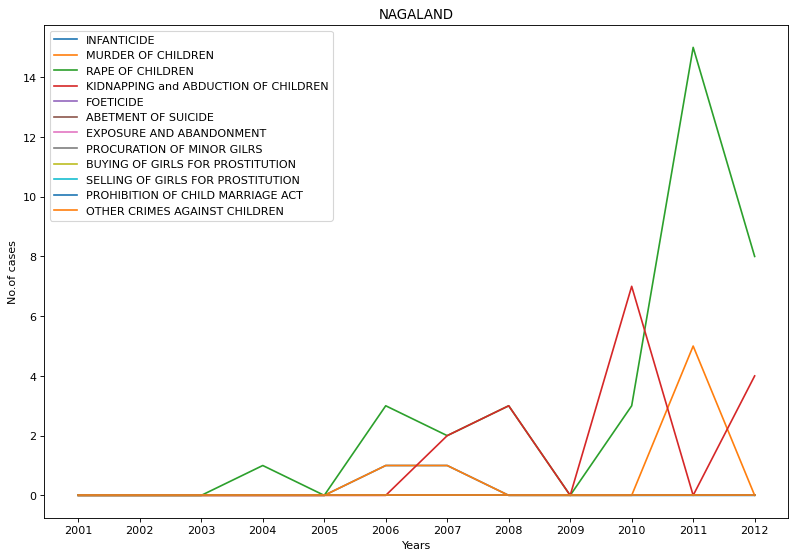

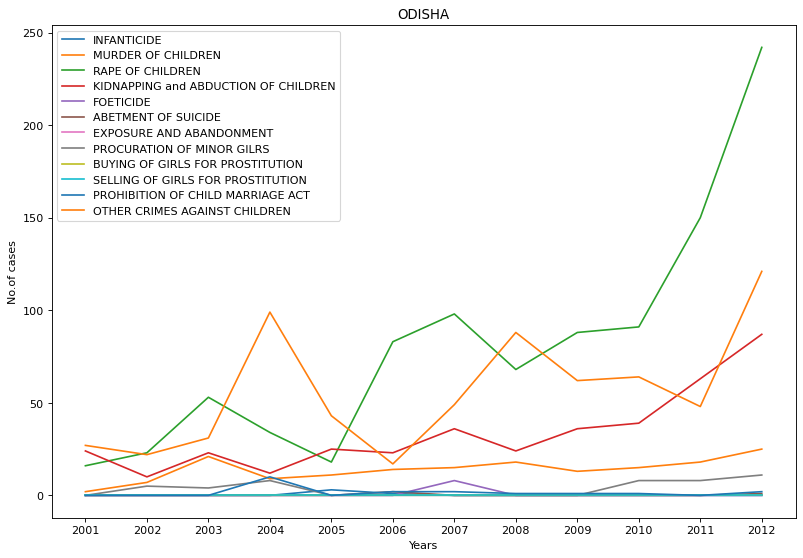

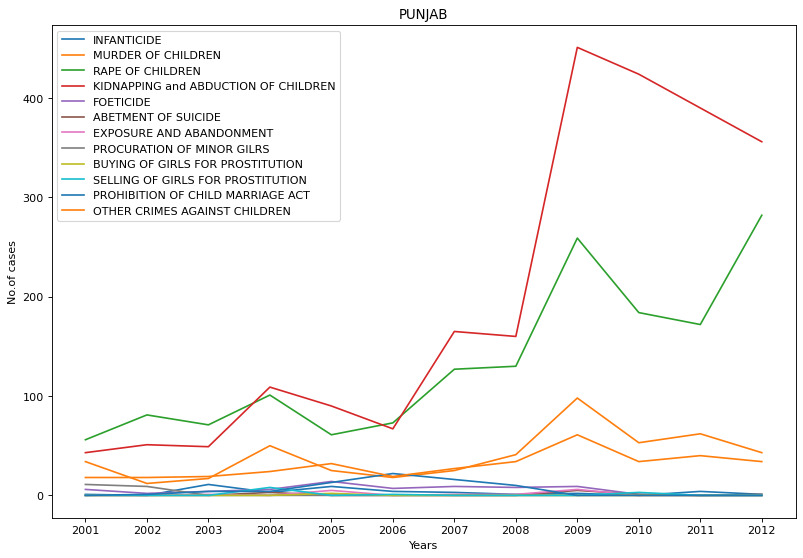

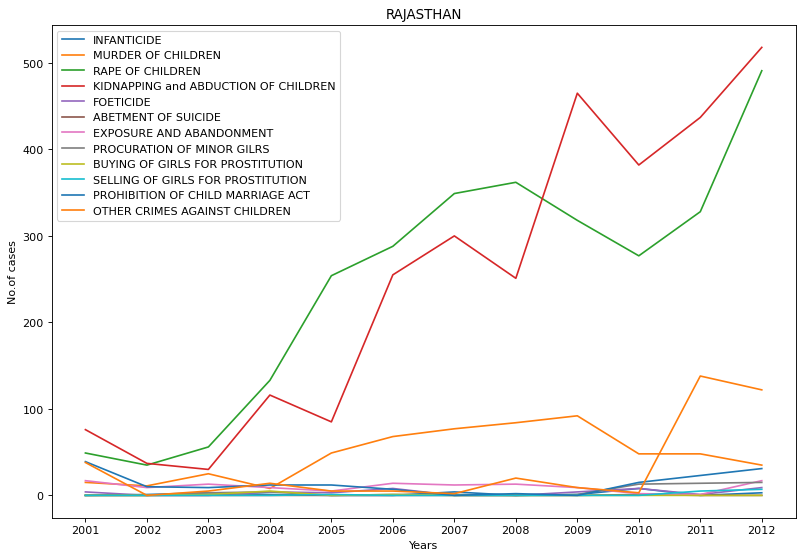

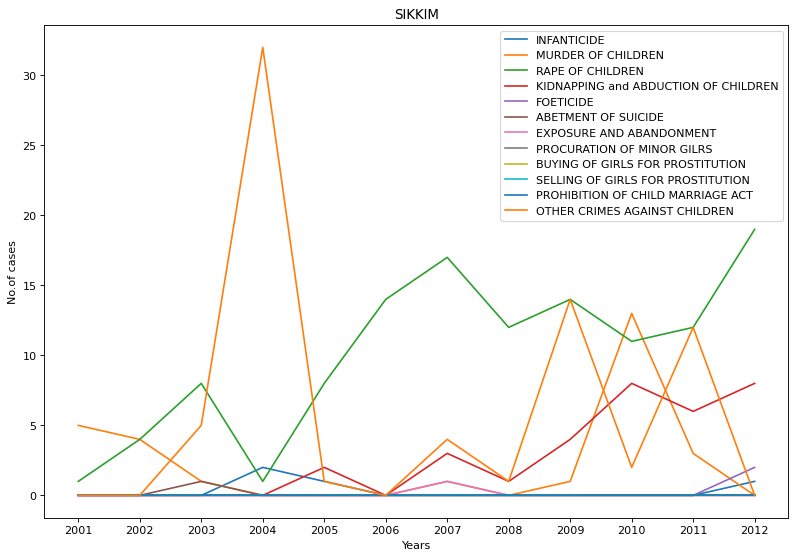

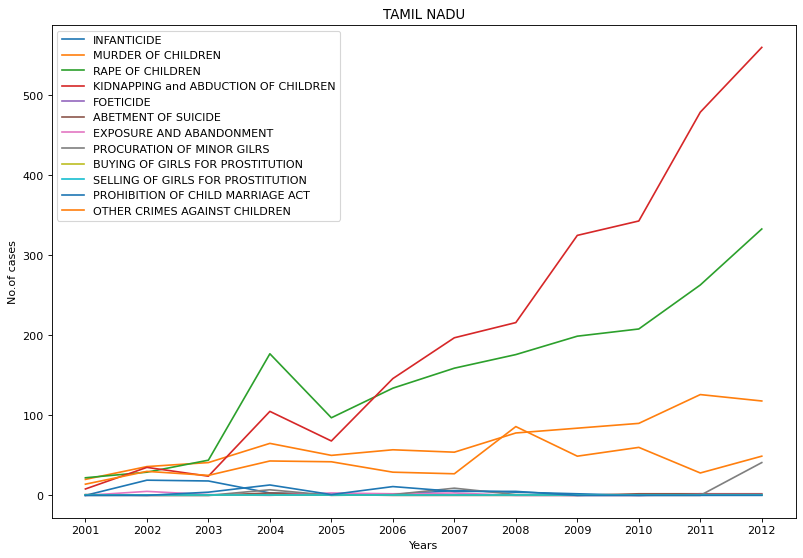

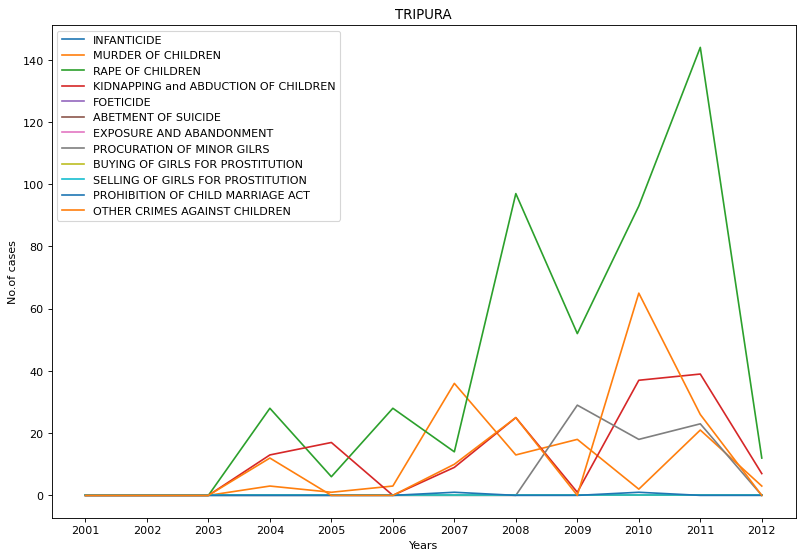

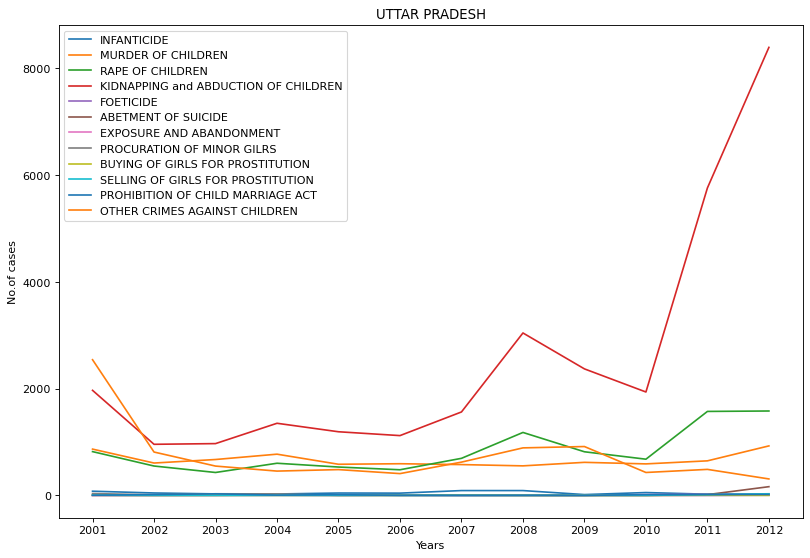

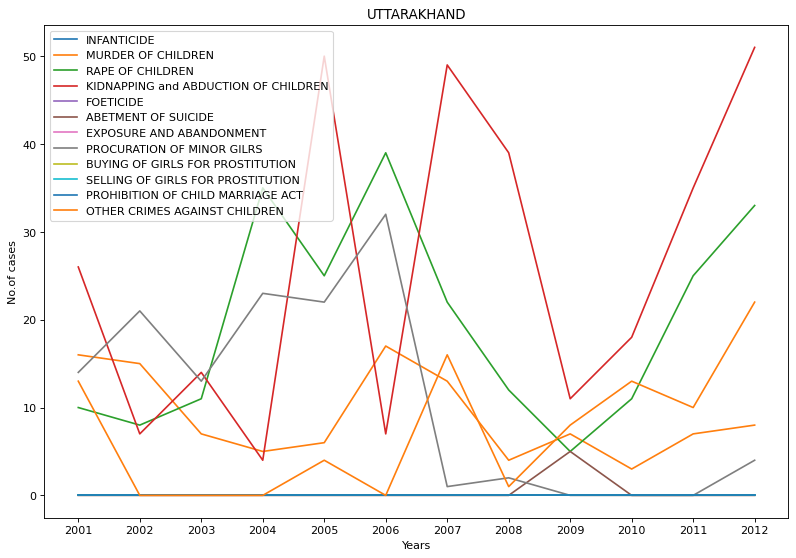

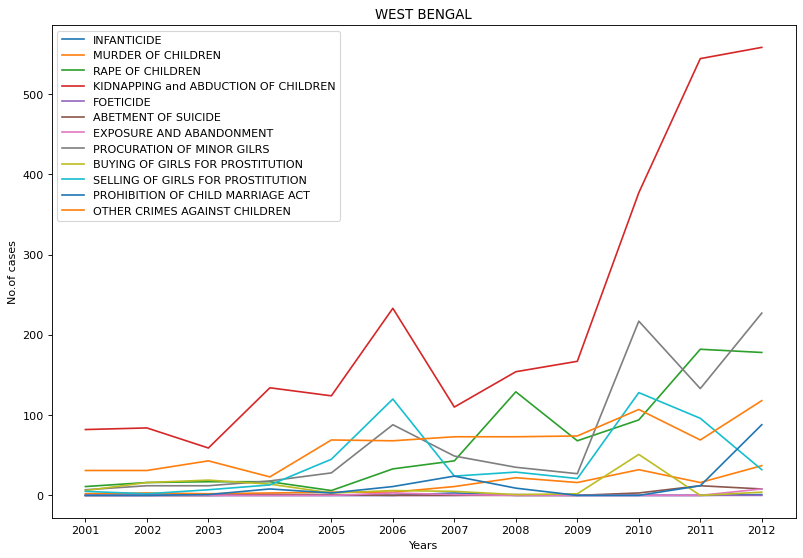

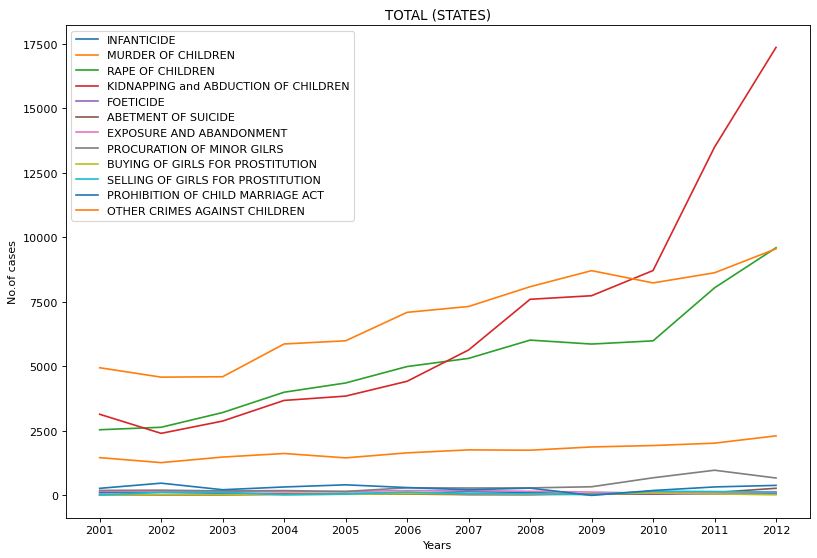

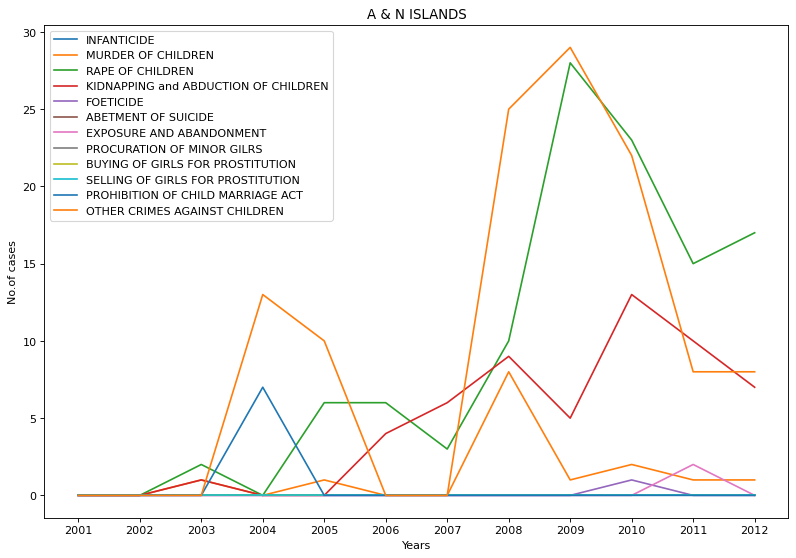

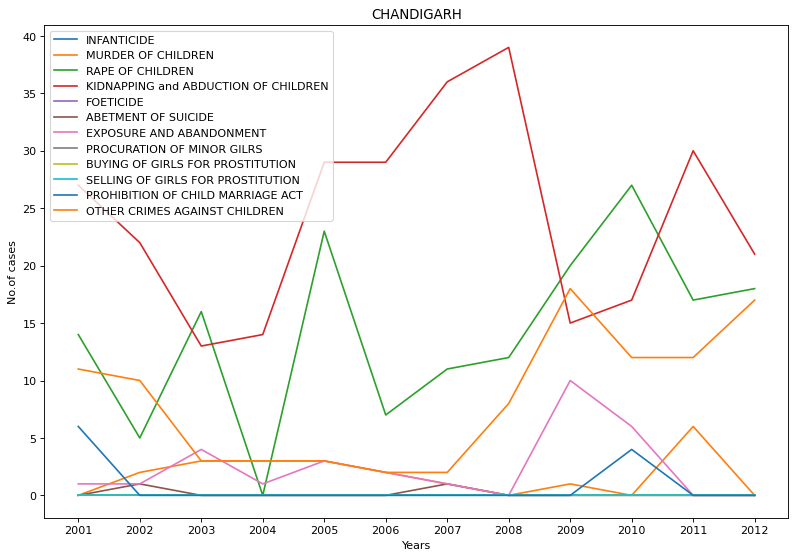

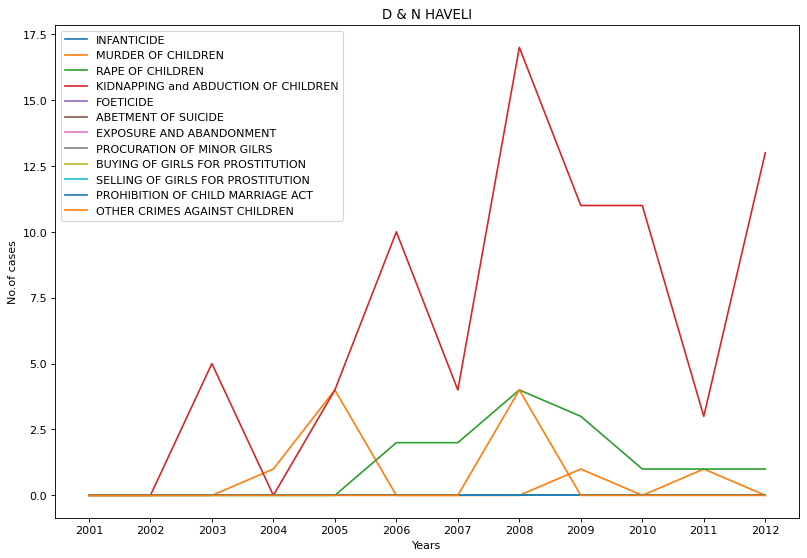

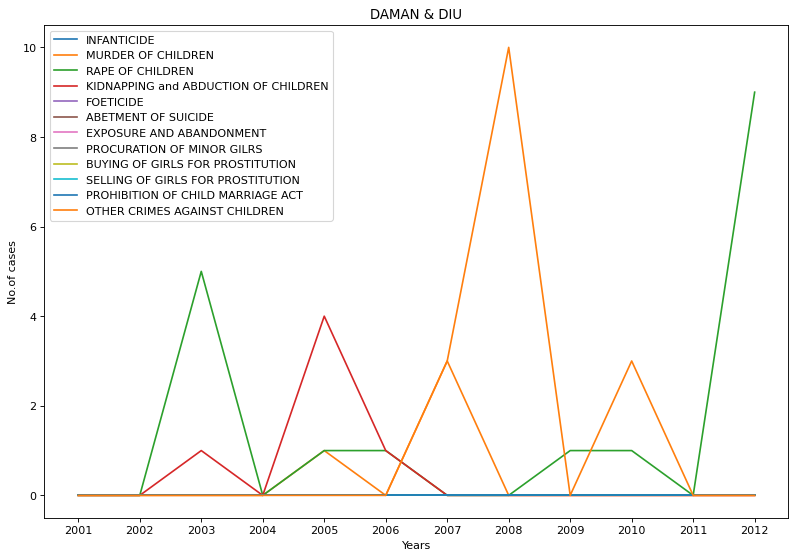

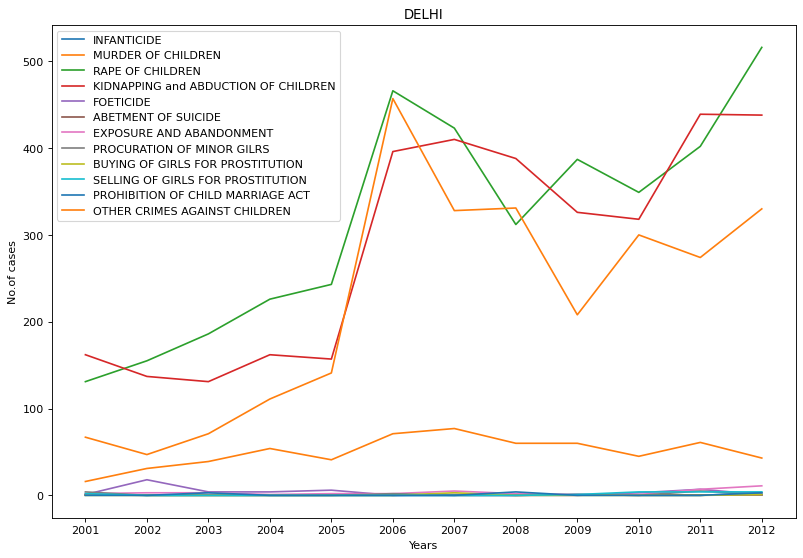

In [8]:
for state in STATES_IN_INDIA:
    fig=plt.figure(figsize=(12, 8), dpi=80, facecolor='w',edgecolor='k')
    plt.title(state)
    plt.xlabel('Years')
    plt.ylabel('No.of cases')
    for case in TYPES_OF_CASES:
        temp_df=df[(df['STATE/UT'] == state ) & (df['CRIME HEAD'] == case)]
        N_cases = [temp_df[c].values[0] for c in years_title]
        plt.plot(years_title,N_cases)
        plt.legend(TYPES_OF_CASES)

In [9]:
print('Data set :')
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("feature '{col_name}' has {unique_cat} categories".format(col_name=col_name,unique_cat=unique_cat))
        
print()

Data set :
feature 'STATE/UT' has 38 categories
feature 'CRIME HEAD' has 13 categories



In [10]:
from sklearn import preprocessing

lab=preprocessing.LabelEncoder()

#df['STATE/UT']=lab.fit_transform(df['STATE/UT'])
df['CRIME HEAD']=lab.fit_transform(df['CRIME HEAD'])

df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,5,1,1,3,0,0,0,1,0,5,6,1,6
1,ARUNACHAL PRADESH,5,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,5,0,5,0,0,1,0,0,0,0,0,0,0
3,BIHAR,5,0,0,0,0,2,0,2,2,0,2,5,2
4,CHHATTISGARH,5,7,29,5,12,0,15,11,6,2,0,10,5


In [11]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=9)
kmeans.fit(df.iloc[:,1:])

KMeans(n_clusters=9)

In [12]:
kmeans.cluster_centers_

array([[4.16666667e+00, 6.07333333e+02, 6.25416667e+02, 6.88750000e+02,
        8.43833333e+02, 8.37916667e+02, 1.10366667e+03, 1.25916667e+03,
        1.31375000e+03, 1.36675000e+03, 1.56233333e+03, 1.82916667e+03,
        1.88625000e+03],
       [0.00000000e+00, 1.31760000e+04, 1.22795000e+04, 1.32760000e+04,
        1.63565000e+04, 1.70065000e+04, 2.01205000e+04, 2.17610000e+04,
        2.51320000e+04, 2.54385000e+04, 2.68105000e+04, 3.47600000e+04,
        4.13695000e+04],
       [6.03233256e+00, 8.63972286e+00, 1.01593533e+01, 1.06397229e+01,
        1.14457275e+01, 1.33648961e+01, 1.63995381e+01, 1.62124711e+01,
        1.68036952e+01, 1.58614319e+01, 1.95404157e+01, 2.21639723e+01,
        2.76120092e+01],
       [8.00000000e+00, 4.98900000e+03, 4.61650000e+03, 4.63900000e+03,
        5.93550000e+03, 6.07200000e+03, 7.32800000e+03, 7.49300000e+03,
        8.28300000e+03, 8.84250000e+03, 8.40650000e+03, 8.77900000e+03,
        9.73900000e+03],
       [6.00000000e+00, 3.24050000e+

In [13]:
labels=kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 7, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2,
       7, 0, 7, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 0, 2, 2, 5, 2, 2, 2, 2, 7,
       2, 2, 7, 5, 7, 2, 2, 0, 2, 2, 7, 2, 2, 2, 2, 2, 2, 7, 7, 2, 2, 2,
       2, 2, 7, 7, 2, 7, 2, 6, 2, 7, 4, 2, 2, 2, 2, 7, 2, 2, 7, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2,

In [14]:
import numpy as np

unique, counts = np.unique(kmeans.labels_, return_counts=True)

dict_data=dict(zip(unique, counts))
dict_data

{0: 12, 1: 2, 2: 433, 3: 2, 4: 2, 5: 3, 6: 3, 7: 36, 8: 1}

In [15]:
df["cluster"] = kmeans.labels_

In [16]:
kmeans.inertia_

111360428.62843215

In [17]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=9)>

In [18]:
df

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,cluster
0,ANDHRA PRADESH,5,1,1,3,0,0,0,1,0,5,6,1,6,2
1,ARUNACHAL PRADESH,5,0,0,0,0,0,0,0,0,0,0,0,0,2
2,ASSAM,5,0,5,0,0,1,0,0,0,0,0,0,0,2
3,BIHAR,5,0,0,0,0,2,0,2,2,0,2,5,2,2
4,CHHATTISGARH,5,7,29,5,12,0,15,11,6,2,0,10,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,DELHI,0,386,391,437,558,590,1394,1247,1097,984,1020,1199,1351,0
490,LAKSHADWEEP,0,1,0,0,0,0,0,0,0,0,0,0,0,2
491,PUDUCHERRY,0,4,23,5,13,11,39,22,25,20,22,29,32,2
492,TOTAL (UTs),0,450,455,496,613,693,1499,1342,1268,1147,1185,1334,1495,0


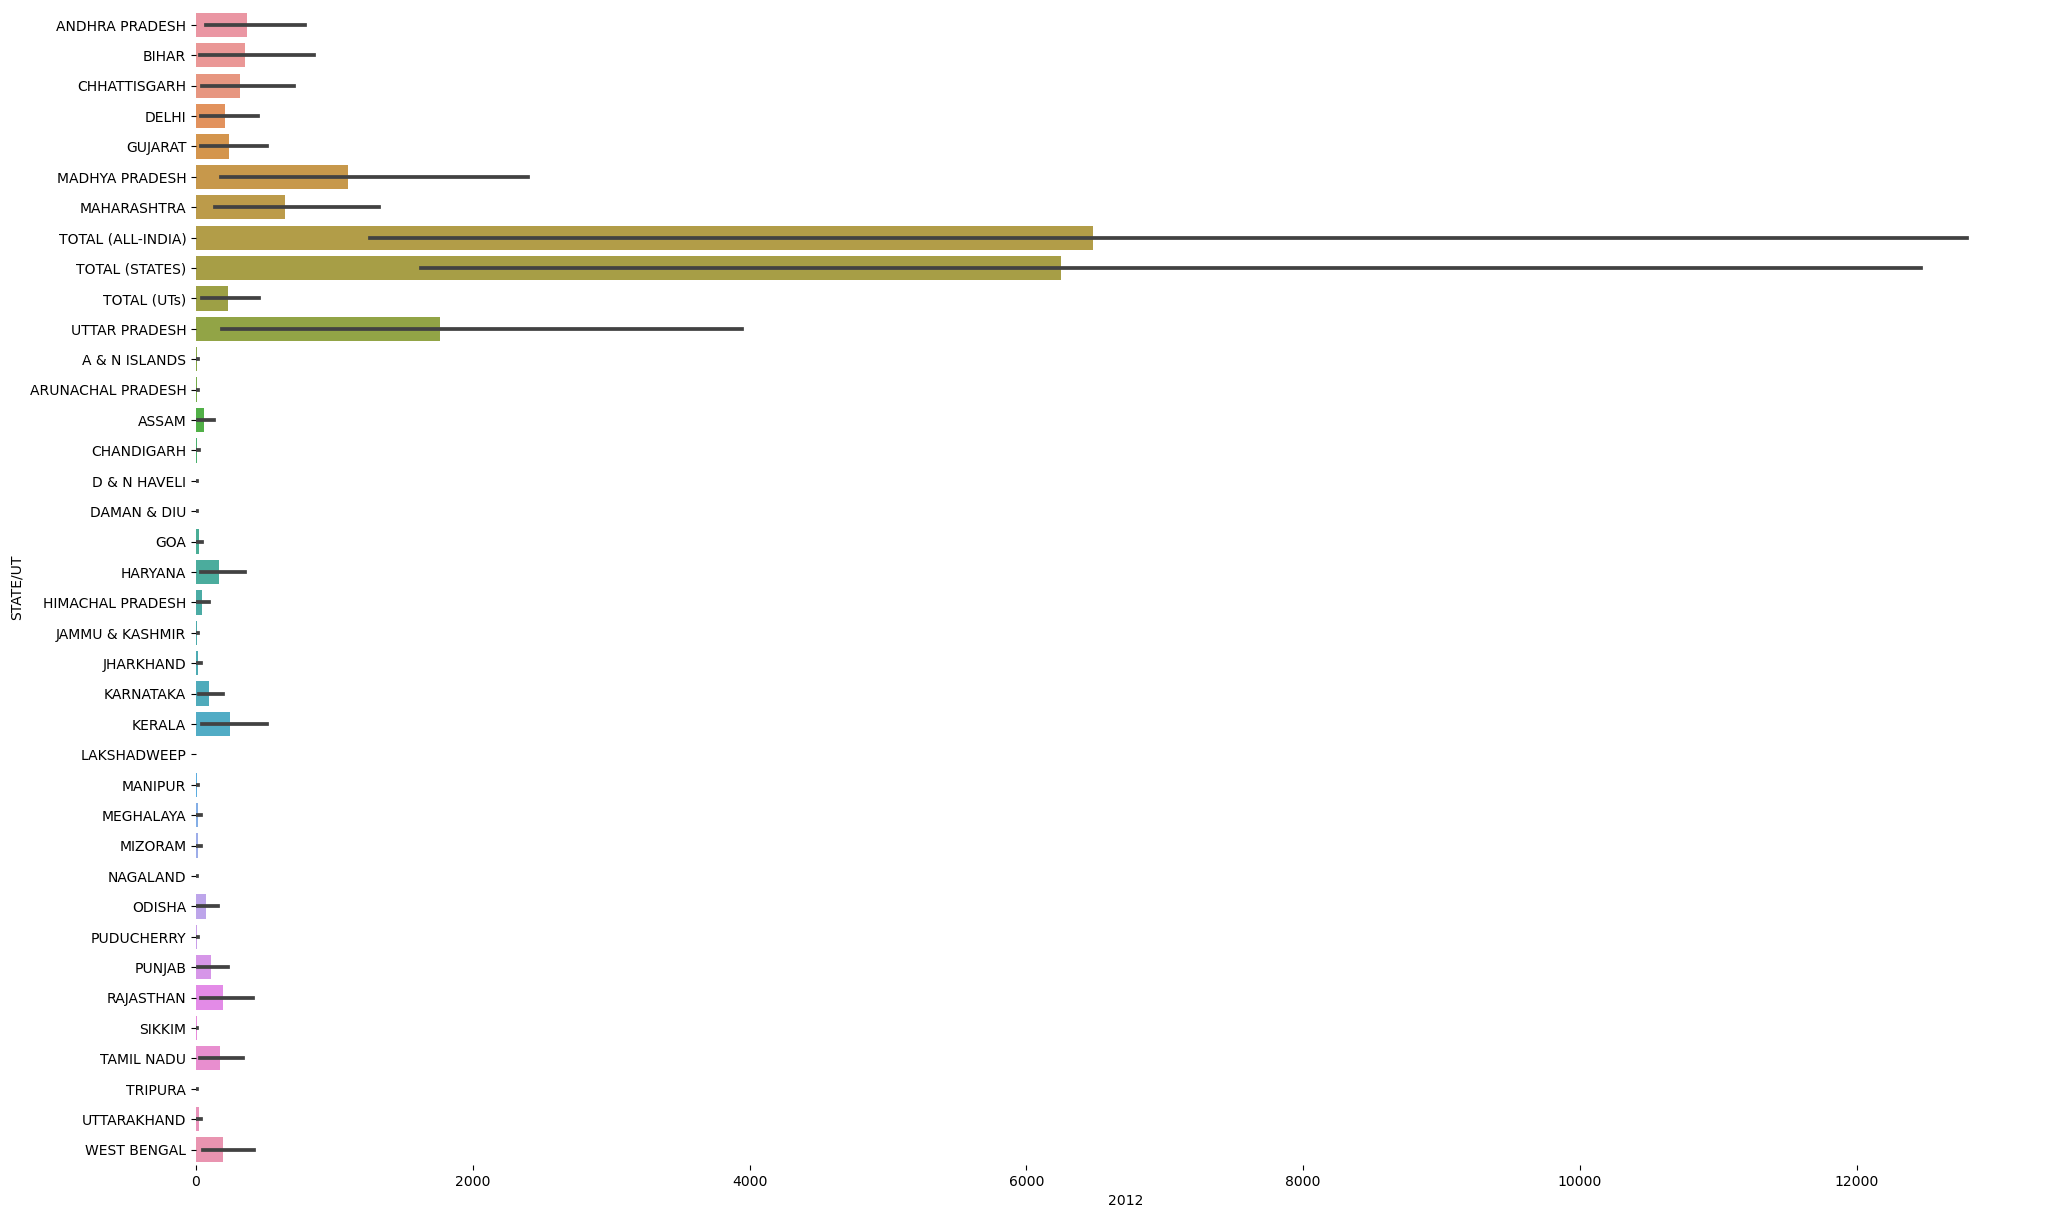

In [20]:
import seaborn as sns
f, ax = plt.subplots(figsize=(24,15))
stats=df.sort_values([ "cluster", "STATE/UT"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="STATE/UT", x="2012", data=stats)

sns.despine(left=True, bottom=True)

In [21]:
X = df.iloc[:,1:14]
y = df.iloc[:,df.columns=='cluster']

In [22]:
print(X.head())
y.head()

   CRIME HEAD  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0           5     1     1     3     0     0     0     1     0     5     6   
1           5     0     0     0     0     0     0     0     0     0     0   
2           5     0     5     0     0     1     0     0     0     0     0   
3           5     0     0     0     0     2     0     2     2     0     2   
4           5     7    29     5    12     0    15    11     6     2     0   

   2011  2012  
0     1     6  
1     0     0  
2     0     0  
3     5     2  
4    10     5  


,cluster
0,2
1,2
2,2
3,2
4,2


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,y_train)

y_pred=random_forest.predict(X_test)
print(y_pred)

from sklearn.metrics import accuracy_score,classification_report
acc1=accuracy_score(y_pred,y_test)
print(acc1)

clf=classification_report(y_pred,y_test)
print(clf)

[2 2 2 2 7 2 2 2 2 2 2 7 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2
 2 2 2 2 2 2 5 0 2 2 2 2 0 2 3 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 6 2 2
 2 2 0 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2]
0.9595959595959596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       1.00      0.99      0.99        87
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.80      1.00      0.89         4

    accuracy                           0.96        99
   macro avg       0.54      0.62      0.57        99
weighted avg       0.96      0.96      0.96        99



C:\Users\91934\AppData\Local\Temp\ipykernel_24720\2360095384.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision a

In [25]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

lg.fit(X_train,y_train)

predic2=lg.predict(X_test)

acc2=accuracy_score(predic2,y_test)
print(acc2)

clf2=classification_report(predic2,y_test)
print(clf2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.797979797979798
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.00      0.00      0.00         0
           2       0.86      0.99      0.92        75
           3       1.00      0.11      0.20         9
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.40      0.50      0.44         4
           8       0.00      0.00      0.00         2

    accuracy                           0.80        99
   macro avg       0.37      0.24      0.25        99
weighted avg       0.80      0.80      0.76        99



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

In [26]:
from sklearn import svm

sv=svm.LinearSVC()

sv.fit(X_train,y_train)

predic3=sv.predict(X_test)

acc3=accuracy_score(predic3,y_test)
print(acc3)

clf3=classification_report(predic3,y_test)
print(clf3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8686868686868687
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.00      0.00      0.00         0
           2       0.99      0.97      0.98        88
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         5

    accuracy                           0.87        99
   macro avg       0.19      0.19      0.19        99
weighted avg       0.89      0.87      0.88        99



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

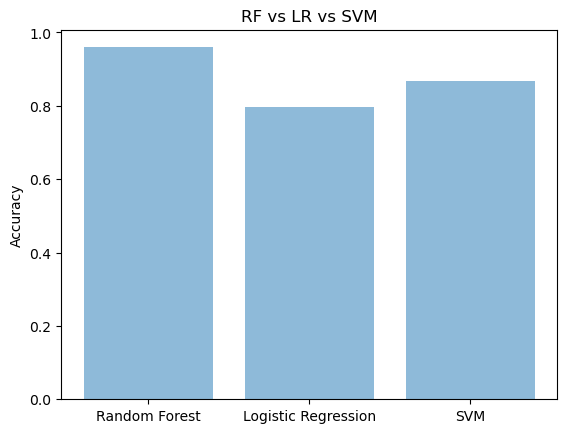

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Random Forest', 'Logistic Regression', 'SVM')
y_pos=np.arange(len(objects))
performance=[acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('RF vs LR vs SVM')

plt.show()